# Markov chain Monte Carlo

> https://youtu.be/rZk2FqX2XnY

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


## Metropolis algorithm

Example:

Imagine an archipelago with $J$ Islands that each have a population of $p_j$. The islands are 1-dimensionally sorted by increasing population sizes and in each turn you can move between two neighboring islands. By definition the largest and smallest island are considered neighbors (wrap-around) with the smallest island being to the "right" of the largest island (although it's 1-dimensionally all the way to the left). 

King Markov will move to a neighbor using the following algorithm (Metropolis algorithm).

- Select a candidate island among the neighbors with uniform probability, i.e. 0.5 of choosing left and 0.5 of choosing right.
- Move to candidate $j$ from island $i$ (current island) with probability $\frac{p_j}{p_i}$.

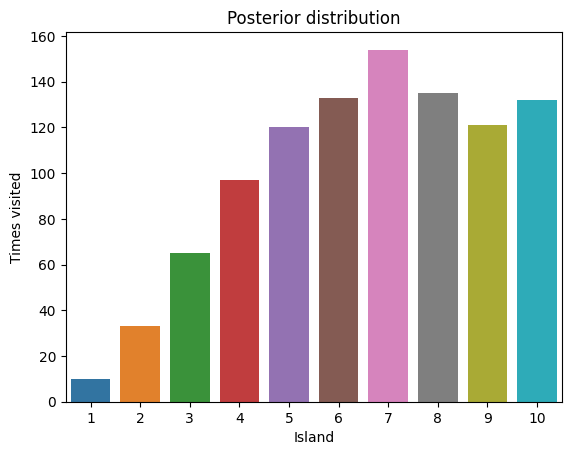

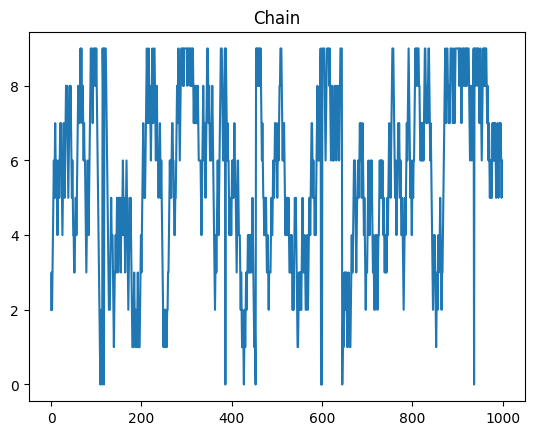

In [24]:
def sim_move(islands, start, k):
    N = len(islands)
    current = start
    counts = np.zeros(N)
    chain = []
    for _ in range(k):
        counts[current] += 1
        chain.append(current)
        move = (current + np.random.choice([-1, 1])) % N
        pop_current = islands[current]
        pop_move = islands[move]
        if np.random.random() < pop_move/pop_current:
            current = move
    return chain, counts 

islands = np.arange(1, 11)
n_iterations = int(1e3)
chain, posterior = sim_move(islands, np.random.choice(islands), n_iterations)

sns.barplot(x=islands, y=posterior)
plt.title('Posterior distribution')
plt.xlabel('Island')
plt.ylabel('Times visited')
plt.show()

sns.lineplot(chain)
plt.title('Chain')
plt.show()